# EXERCISE 2.1: LOGISTIC REGRESSION

*This is the programming assignment for **week 3** of the Stanford University **Machine Learning** course on coursera.org*

## Before you start

Read the original assignment document (ex2.pdf), this will guide you through the assignment.
Note that the PDF is the orginal document for the course which assumes you will be implementing the assignment in Matlab/Octave. 

Do not change any code in this nodebook file; your job is to implement the following:
- <u>Task 1</u>: plotData.py (optional exercise)
- <u>Task 2</u>: sigmoid.py
- <u>Task 3</u>: costFunction.py
- <u>Task 4</u>: predict.py

Variable conventions:
- ``m`` : number of training examples (rows in the dataset) - scalar value
- ``n`` : number of features in the data (columns in the dataset, excluding the column with result values) - scalar value
- ``X_data`` : m x n matrix representing all input data - 2D array
  - ``X_data[i,j]`` = value of input feature ``j`` for training example ``i`` 
- ``X`` : m x (n+1) design matrix, basically X_data preprended with a column of ones - 2D array
- ``y`` : m element result vector - 1D array
  - this is the original result vector as used for the MATLAB/Octave implementation, where ``10`` is used to represent the digit ``0``;
    MATLAB/Octave uses 1-based indexing which has lead to this '0 = 10' design decision
- ``y_rebased`` : 
  - slightly altered version of ``y``, which makes it more more suitable to use it in Python's 0-based indexing environment
  - all ``10`` values are replaced by ``0`` values, all other values are the same
- ``theta`` : n+1 element fitting parameter vector - 1D array

https://github.com/arturomp/coursera-machine-learning-in-python/tree/master/mlclass-ex2-004/mlclass-ex2


In [1]:
# 3rd party libraries
import numpy as np
import scipy.optimize as opt

# pre-defined functions
from plotDecisionBoundary import plotDecisionBoundary

# user defined functions; you will be implementing these 
from plotData import plotData                 # task 1
from sigmoid import sigmoid                   # task 2
from costFunction import costFunction         # task 3
from predict import predict                   # task 4

## Part 1: Plotting 

We start the exercise by first plotting the data to understand the problem we are working with.

<u>Task 1</u>: implement plotData.py (optional exercise)

<module 'matplotlib.pyplot' from 'C:\\dev\\sys\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

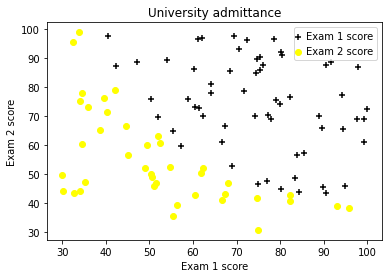

In [2]:
# read the data from the CSV file
data = np.genfromtxt('ex2data1.txt', delimiter=',')

# separate data into
# - features matrix X_data: all columns but the last of the dataset
# - result vector y: last column  of the dataset
X_data = data[:, :-1]
y = data[:, -1]

# Task 1: implement the plotData method
plotData(X_data, y, 'University admittance', 'Exam 1 score', 'Exam 2 score')

## Part 2: Compute Cost and Gradient

In this part of the exercise you will implement a method to calculate the cost and gradient for logistic regression for a particular value of theta.

<u>Task 2</u>: implement sigmoid.py

<u>Task 3</u>: implement costFunction.py

In [3]:
# Task 2: implement the sigmoid function, should work for scalars, vectors and matrices
sigmoid(0)

0.5

*(expected value: 0.5)*

In [4]:
sigmoid(np.array([0, 1, -1000000, 1000000]))

C:\dev\git\machinelearning-coursera\jupyter\ex2\sigmoid.py:10: RuntimeWarning: overflow encountered in exp
  z = exp(-x)


array([0.5       , 0.73105858, 0.        , 1.        ])

*(expected values: [0.5       , 0.73105858, 0.        , 1.        ])*

In [5]:
sigmoid(np.array([[0, 1], [-1000000, 1000000]]))

array([[0.5       , 0.73105858],
       [0.        , 1.        ]])

*(expected values: [[0.5       , 0.73105858],       [0.        , 1.        ]])*

In [6]:
# Create the 'design matrix' X by adding a column of ones (for the intercept term) to the front of X_data
m = X_data.shape[0]
X = np.append( np.ones((m,1)), X_data, axis=1)

# Initialize fitting parameters
n = X_data.shape[1]
initial_theta = np.zeros(n+1)

In [7]:
# Compute and display cost and gradient for initial theta
# (Task 3: implement costFunction.py)
cost, grad = costFunction(initial_theta, X, y)

In [8]:
# display cost for initial theta
cost

0.6931471805599453

*(expected value (approx): 0.693)* 

In [9]:
# display gradient for initial theta
grad

array([ -0.1       , -12.00921659, -11.26284221])

*(expected values (approx): -0.1000, -12.0092, -11.2628)*

In [10]:
# Compute cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

In [11]:
# display cost for non-zero theta
cost

0.21833019382659777

*(expected value (approx): 0.218)*

In [12]:
# display gradient with non-zero theta
grad

array([0.04290299, 2.56623412, 2.64679737])

*(expected values (approx): 0.043, 2.566, 2.647)*

## Part 3: Optimizing using built-in cost optimization 

In this part we will use a built-in cost minimalisation mechanism to find the optimal parameters theta.

Note: The Matlab/Octave exercise description uses the Matlab specific optimization method ``fminunc`` to calculate the optimal theta value. The ``scipy.optimize.minimze`` minimization wrapper combined with the ``BFGS`` minimization method is the python equivalent.

*No tasks*

In [13]:
# Run `minimize` to obtain the optimal theta.
# This function takes the `costFunction` you implemented earlier as a parameter.

myargs = (X, y)
myoptions = {'disp': False, 'maxiter':400} # set 'disp': True to display detail results of the minimization method
optimal_theta = opt.minimize(costFunction, x0=initial_theta, args=myargs, options=myoptions, method="BFGS", jac=True)["x"]
optimal_theta

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


C:\dev\git\machinelearning-coursera\jupyter\ex2\costFunction.py:53: RuntimeWarning: divide by zero encountered in log
  _J = (-(y.T) @ log(h) - (1-y).T @ log(1-h)) / m
C:\dev\git\machinelearning-coursera\jupyter\ex2\costFunction.py:53: RuntimeWarning: invalid value encountered in matmul
  _J = (-(y.T) @ log(h) - (1-y).T @ log(1-h)) / m


array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [14]:
# calculate the costs for this specific value of theta
cost, _ = costFunction(optimal_theta, X, y)
cost

0.20349770158944375

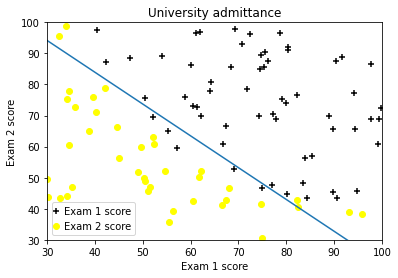

In [15]:
# plot data with decision boundary
plotDecisionBoundary(optimal_theta, X, y, 'University admittance', 'Exam 1 score', 'Exam 2 score')

## Part 4: Predict and Accuracies

Predict the outcomes on unseen data. Furthermore, you will compute the training and test set accuracies of our model. 

<u>Task 5:</u> implement predict.py

 

In [16]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 will be admitted
prob = sigmoid(np.array([1, 45, 85]) @ optimal_theta)
prob

0.7762907240588942

*(expected value: 0.775 +/- 0.002)*

In [17]:
# Compute accuracy on our training set
# (task 4: implement predict.py) 
p = predict(optimal_theta, X)
accuracy = np.mean(np.double(p == y)) * 100
accuracy

89.0

*(expected accuracy (approx): 89.0)*